In [144]:
import pandas as pd
df=pd.read_csv(f"C:\\Users\\ASUS\\dataAnylist\\tested.csv")
df



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [100]:
df.shape

(418, 14)

In [101]:
# df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    int64  
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked_C   418 non-null    uint8  
 12  Embarked_Q   418 non-null    uint8  
 13  Embarked_S   418 non-null    uint8  
dtypes: float64(2), int64(6), object(3), uint8(3)
memory usage: 37.3+ KB


In [122]:
ports=pd.get_dummies(df.Embarked,prefix="Embarked")
ports

,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1
...,...,...,...
413,0,0,1
414,1,0,0
415,0,0,1
416,0,0,1


In [123]:
df=df.join(ports)
df.drop(['Embarked'],axis=1,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,0,1,0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,0,0,1
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,0,1,0
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,0,0,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,0,0,1


In [124]:
df.Sex=df.Sex.map({'male':0,'female':1})

In [125]:
y=df.Survived.copy()
x=df.drop(['Survived'],axis=1)

In [106]:
x

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",NaN,34.5,0,0,330911,7.8292,NaN,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",NaN,47.0,1,0,363272,7.0000,NaN,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",NaN,62.0,0,0,240276,9.6875,NaN,0,1,0
3,895,3,"Wirz, Mr. Albert",NaN,27.0,0,0,315154,8.6625,NaN,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",NaN,22.0,1,1,3101298,12.2875,NaN,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",NaN,NaN,0,0,A.5. 3236,8.0500,NaN,0,0,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",NaN,39.0,0,0,PC 17758,108.9000,C105,1,0,0
415,1307,3,"Saether, Mr. Simon Sivertsen",NaN,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,0,0,1
416,1308,3,"Ware, Mr. Frederick",NaN,NaN,0,0,359309,8.0500,NaN,0,0,1


In [126]:
y

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [127]:
x.drop(['Cabin','Ticket','Name','PassengerId'],axis=1,inplace=True)
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,0,34.5,0,0,7.8292,0,1,0
1,3,1,47.0,1,0,7.0000,0,0,1
2,2,0,62.0,0,0,9.6875,0,1,0
3,3,0,27.0,0,0,8.6625,0,0,1
4,3,1,22.0,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...,...
413,3,0,NaN,0,0,8.0500,0,0,1
414,1,1,39.0,0,0,108.9000,1,0,0
415,3,0,38.5,0,0,7.2500,0,0,1
416,3,0,NaN,0,0,8.0500,0,0,1


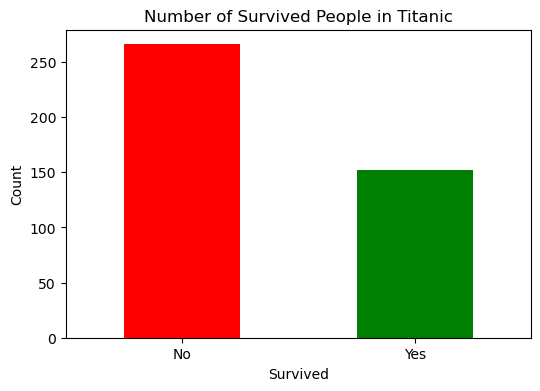

In [128]:
plt.figure(figsize=(6, 4))
df['Survived'].value_counts().plot(kind='bar', color=['red', 'green'])
plt.title('Number of Survived People in Titanic')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)
plt.show()

In [129]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Sex         418 non-null    int64  
 2   Age         332 non-null    float64
 3   SibSp       418 non-null    int64  
 4   Parch       418 non-null    int64  
 5   Fare        417 non-null    float64
 6   Embarked_C  418 non-null    uint8  
 7   Embarked_Q  418 non-null    uint8  
 8   Embarked_S  418 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 20.9 KB


In [130]:
x.isnull().values.any()

True

In [131]:

x[pd.isnull(x).any(axis=1)].head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
10,3,0,NaN,0,0,7.8958,0,0,1
22,1,1,NaN,0,0,31.6833,0,0,1
29,3,0,NaN,2,0,21.6792,1,0,0
33,3,1,NaN,1,2,23.4500,0,0,1
36,3,1,NaN,0,0,8.0500,0,0,1


In [132]:
x.Age.fillna(x.Age.mean(),inplace=True)
x.Fare.fillna(x.	Fare.mean(),inplace=True)

In [133]:
x.isnull().values.any()

False

In [134]:
from sklearn.model_selection import train_test_split
x_train,x_valid,y_train,y_valid =train_test_split(x,y,test_size=0.2,random_state=7)

In [119]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [135]:
model.fit(x_train,y_train)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [137]:
t=model.score(x_train,y_train)
t

1.0

In [139]:
print("accuracy of model :",t*100)

accuracy of model : 100.0


# # Age Feature

In [147]:
import numpy as np
import seaborn as sns

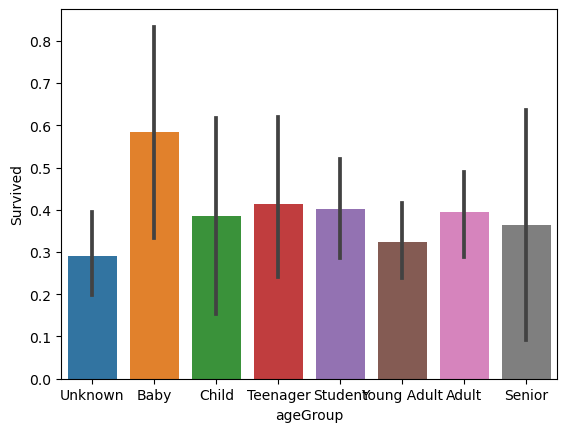

In [154]:
df["Age"] = df["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
df['ageGroup'] = pd.cut(df["Age"], bins, labels = labels)

#draw a bar plot of Age vs. survival
sns.barplot(x="ageGroup", y="Survived", data=df)
plt.show()

 # Survival Count

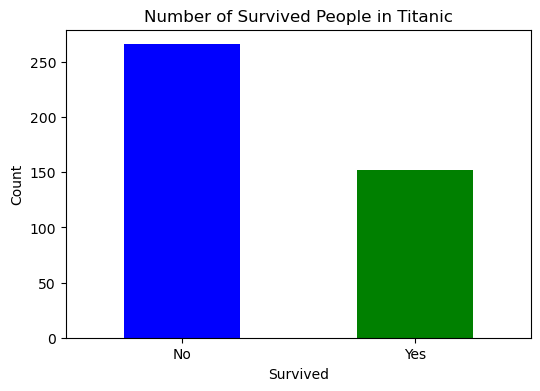

In [157]:
plt.figure(figsize=(6, 4))
df['Survived'].value_counts().plot(kind='bar', color=['blue', 'green'])
plt.title('Number of Survived People in Titanic')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)
plt.show()

# pClass Feature

Percentage of Pclass = 1 who survived: 46.728971962616825
Percentage of Pclass = 2 who survived: 32.25806451612903
Percentage of Pclass = 3 who survived: 33.02752293577982


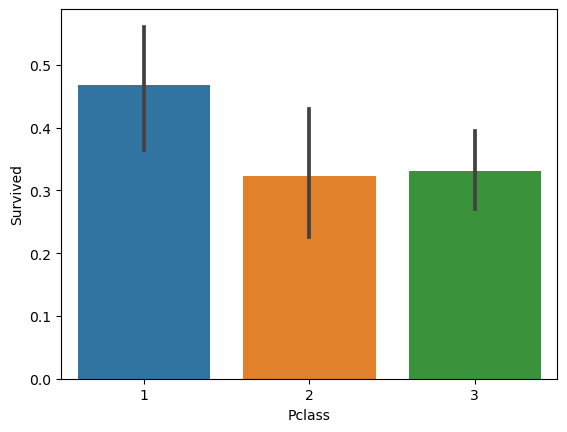

In [159]:
sns.barplot(x="Pclass", y="Survived", data=df)

#print percentage of people by Pclass that survived
print("Percentage of Pclass = 1 who survived:", df["Survived"][df["Pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 2 who survived:", df["Survived"][df["Pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 3 who survived:", df["Survived"][df["Pclass"] == 3].value_counts(normalize = True)[1]*100)